# **Pull Data From the MySQL Database**

In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [179]:
load_dotenv()

True

In [180]:
# Fetch credentials and connection info from environment
user = os.getenv("MYSQL_USER")
password = os.getenv("MYSQL_PASSWORD")
host = os.getenv("MYSQL_HOST", "127.0.0.1")
port = int(os.getenv("MYSQL_PORT", "3306"))
database = os.getenv("MYSQL_DATABASE")

# Create SQLAlchemy engine
connection_url = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_url)

In [181]:
# Load the Updated Data
query = "SELECT * FROM banking_data_updated"

# Read data into DataFrame
with engine.connect() as conn:
  df = pd.read_sql(query, conn)

# Display result
print("Connected to database:", database)

Connected to database: analysisfinancial


# **1. Data Preprocessing**

In [182]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail,Mid


In [183]:
df.dtypes

Client ID                           object
Name                                object
Age                                  int64
Location ID                          int64
Joined Bank                 datetime64[ns]
Banking Contact                     object
Nationality                         object
Occupation                          object
Fee Structure                       object
Loyalty Classification              object
Estimated Income                   float64
Superannuation Savings             float64
Amount of Credit Cards               int64
Credit Card Balance                float64
Bank Loans                         float64
Bank Deposits                      float64
Checking Accounts                  float64
Saving Accounts                    float64
Foreign Currency Account           float64
Business Lending                   float64
Properties Owned                     int64
Risk Weighting                       int64
Gender                              object
Investment 

In [184]:
# Calculate the number of days since the joined date
df['Engagement Days'] = (pd.Timestamp.today() - df['Joined Bank']).dt.days
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,Gender,Investment Advisor,Banking Relationship,Income Lavel,Engagement Days
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,Male,Victor Dean,Retail,Low,2262
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,Male,Jeremy Porter,Institutional,Mid,8618
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,Female,Ernest Knight,Private Bank,Mid,5650
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,Male,Eric Shaw,Commercial,High,2301
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,Female,Kevin Kim,Retail,Mid,4743


In [185]:
# Step 1: Data Preprocessing
# Select relevant features
features = ['Age', 'Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Bank Deposits', 'Saving Accounts', 'Engagement Days', 
            'Loyalty Classification', 'Gender']
target = ['Risk Weighting']

# Create Updated DataFrame
df = pd.concat([df[features], df[target]], axis=1)
df.head()

,Age,Estimated Income,Bank Loans,Credit Card Balance,Bank Deposits,Saving Accounts,Engagement Days,Loyalty Classification,Gender,Risk Weighting
0,24,75384.77,776242.92,484.54,1485828.64,607332.46,2262,Jade,Male,2
1,23,289834.31,1270615.43,2256.88,641482.79,344635.16,8618,Jade,Male,3
2,27,169935.23,1052715.84,4568.74,1033401.59,203054.35,5650,Gold,Female,3
3,40,356808.11,121195.06,4205.00,1048157.49,234685.02,2301,Silver,Male,4
4,46,130711.68,1048301.95,3779.49,487782.53,128351.45,4743,Platinum,Female,3


In [186]:
df.isnull().sum()

Age                       0
Estimated Income          0
Bank Loans                0
Credit Card Balance       0
Bank Deposits             0
Saving Accounts           0
Engagement Days           0
Loyalty Classification    0
Gender                    0
Risk Weighting            0
dtype: int64

In [187]:
df.duplicated().sum()

np.int64(0)

# **2. Feature Engineering**

In [188]:
df['Loyalty Classification'].unique()

array(['Jade', 'Gold', 'Silver', 'Platinum'], dtype=object)

Map Loyalty Classification (e.g., Silver=1, Gold=2, Jade=3, Platinum=4) and Gender (e.g., Male=0, Female=1).

In [189]:
df['Loyalty Classification'] = df['Loyalty Classification'].map({'Silver': 1, 'Gold': 2, 'Jade': 3, 'Platinum': 4})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

print(f"Transformed Loyality Uniques: {df['Loyalty Classification'].unique()}\nTransformed Gender Uniques: {df['Gender'].unique()}")

Transformed Loyality Uniques: [3 2 1 4]
Transformed Gender Uniques: [0 1]


In [190]:
df['Debt to Income'] = df['Bank Loans'] / df['Estimated Income'].replace(0, 1)
df['Credit Utilization'] = df['Credit Card Balance'] / df['Estimated Income'].replace(0, 1)
df['Savings to Loan'] = df['Saving Accounts'] / df['Bank Loans'].replace(0, 1)
df['Engagement Years'] = df['Engagement Days'] / 365

df.head()

,Age,Estimated Income,Bank Loans,Credit Card Balance,Bank Deposits,Saving Accounts,Engagement Days,Loyalty Classification,Gender,Risk Weighting,Debt to Income,Credit Utilization,Savings to Loan,Engagement Years
0,24,75384.77,776242.92,484.54,1485828.64,607332.46,2262,3,0,2,10.297079,0.006428,0.782400,6.197260
1,23,289834.31,1270615.43,2256.88,641482.79,344635.16,8618,3,0,3,4.383937,0.007787,0.271235,23.610959
2,27,169935.23,1052715.84,4568.74,1033401.59,203054.35,5650,2,1,3,6.194806,0.026885,0.192886,15.479452
3,40,356808.11,121195.06,4205.00,1048157.49,234685.02,2301,1,0,4,0.339665,0.011785,1.936424,6.304110
4,46,130711.68,1048301.95,3779.49,487782.53,128351.45,4743,4,1,3,8.019956,0.028915,0.122437,12.994521


In [191]:
percentiles = [0, 0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85, 0.90, 0.95, 0.99, 0.995, 1]

for col in ['Age', 'Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Bank Deposits', 'Saving Accounts', 'Engagement Days', 'Debt to Income', 'Credit Utilization', 'Savings to Loan', 'Engagement Years']:
    
  print(f"\nFor Column: {col}\n")
  
  for p in percentiles:
    if p == 0:
      label = "Min"
    elif p == 1:
      label = "Max"
    else:
      label = f"{float(p*100)}th Percentile"
    
    value = df[col].quantile(p)
    print(f"{label} Value: {value}")


For Column: Age

Min Value: 18.0
1.0th Percentile Value: 18.0
5.0th Percentile Value: 21.0
10.0th Percentile Value: 25.0
25.0th Percentile Value: 34.0
50.0th Percentile Value: 51.0
75.0th Percentile Value: 69.0
85.0th Percentile Value: 75.0
90.0th Percentile Value: 79.0
95.0th Percentile Value: 82.0
99.0th Percentile Value: 85.0
99.5th Percentile Value: 85.0
Max Value: 85.0

For Column: Estimated Income

Min Value: 15919.48
1.0th Percentile Value: 22751.2955
5.0th Percentile Value: 37250.301
10.0th Percentile Value: 50645.876000000004
25.0th Percentile Value: 82475.365
50.0th Percentile Value: 141532.01
75.0th Percentile Value: 239941.315
85.0th Percentile Value: 302053.5034999998
90.0th Percentile Value: 340815.4640000001
95.0th Percentile Value: 393393.60649999994
99.0th Percentile Value: 474952.6635000001
99.5th Percentile Value: 492125.87964999984
Max Value: 521159.98

For Column: Bank Loans

Min Value: 0.0
1.0th Percentile Value: 22649.2376
5.0th Percentile Value: 69613.723
10.0t

In [192]:
df.shape

(2894, 14)

In [193]:
for col in ['Age', 'Estimated Income', 'Bank Loans', 'Credit Card Balance', 'Bank Deposits', 'Saving Accounts', 'Engagement Days', 'Debt to Income', 'Credit Utilization', 'Savings to Loan', 'Engagement Years']:
  cap = df[col].quantile(0.9955)
  df = df[df[col] <= cap]

df = df.reset_index(drop=True)
df.shape

(2763, 14)

# **3. Supervised Learning (Predicting Risk Weighting)**

In [194]:
df.head()

,Age,Estimated Income,Bank Loans,Credit Card Balance,Bank Deposits,Saving Accounts,Engagement Days,Loyalty Classification,Gender,Risk Weighting,Debt to Income,Credit Utilization,Savings to Loan,Engagement Years
0,24,75384.77,776242.92,484.54,1485828.64,607332.46,2262,3,0,2,10.297079,0.006428,0.782400,6.197260
1,23,289834.31,1270615.43,2256.88,641482.79,344635.16,8618,3,0,3,4.383937,0.007787,0.271235,23.610959
2,27,169935.23,1052715.84,4568.74,1033401.59,203054.35,5650,2,1,3,6.194806,0.026885,0.192886,15.479452
3,40,356808.11,121195.06,4205.00,1048157.49,234685.02,2301,1,0,4,0.339665,0.011785,1.936424,6.304110
4,46,130711.68,1048301.95,3779.49,487782.53,128351.45,4743,4,1,3,8.019956,0.028915,0.122437,12.994521


In [195]:
df['Risk Weighting'].value_counts()

Risk Weighting
2    1161
1     778
3     426
4     279
5     119
Name: count, dtype: int64

In [196]:
X = df.drop('Risk Weighting', axis=1)
y = df['Risk Weighting']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2210, 13), (553, 13), (2210,), (553,))

In [197]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [198]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
print(f"Random Forest Train Score: {rf_model.score(X_train_scaled, y_train)}")

Random Forest Train Score: 1.0


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.75      0.74       152
           2       0.63      0.77      0.69       243
           3       0.35      0.31      0.33        81
           4       0.36      0.16      0.22        50
           5       0.50      0.07      0.13        27

    accuracy                           0.61       553
   macro avg       0.51      0.41      0.42       553
weighted avg       0.58      0.61      0.58       553





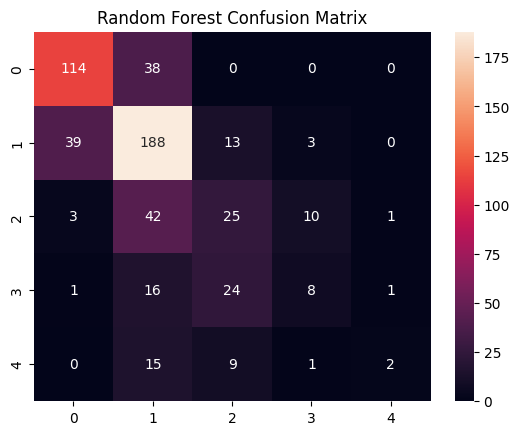

In [199]:
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\n")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [200]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)
print(f"XGBoost Train Score: {xgb_model.score(X_train_scaled, y_train_encoded)}")

XGBoost Train Score: 1.0


XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.71      0.70       152
           2       0.60      0.69      0.64       243
           3       0.34      0.30      0.32        81
           4       0.36      0.28      0.31        50
           5       0.40      0.07      0.12        27

    accuracy                           0.57       553
   macro avg       0.48      0.41      0.42       553
weighted avg       0.55      0.57      0.55       553





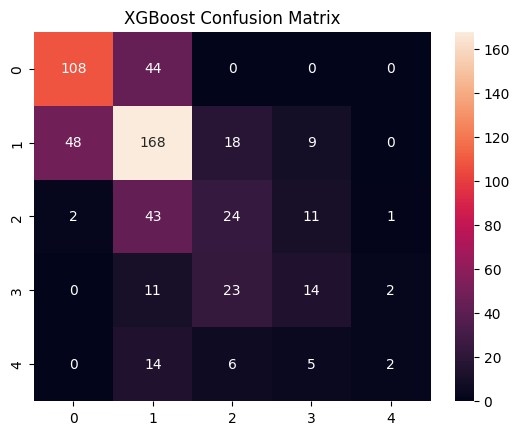

In [201]:
preds = xgb_model.predict(X_test_scaled)
y_pred_xgb = le.inverse_transform(preds)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\n")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.show()